In [71]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_samples

In [72]:
#columnNames = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","label"]
columnNames = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]
df = pd.read_csv("C:\\Users\\H359473\\Downloads\\bank\\bank-full.csv", names=columnNames)

In [73]:
print(df.shape)
print(df.iloc[0,:])

(45211, 17)
age                  58
job          management
marital         married
education      tertiary
default              no
balance            2143
housing             yes
loan                 no
contact         unknown
day                   5
month               may
duration            261
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 0, dtype: object


In [74]:
df = df.drop(columns=["job","education","default","balance","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"])

In [75]:
df.housing = df.housing.replace({"yes": 1, "no": 0})
print(df)

       age   marital  housing
0       58   married        1
1       44    single        1
2       33   married        1
3       47   married        1
4       33    single        0
...    ...       ...      ...
45206   51   married        0
45207   71  divorced        0
45208   72   married        0
45209   57   married        0
45210   37   married        0

[45211 rows x 3 columns]


In [76]:
features = list(df.columns)
print(features)

['age', 'marital', 'housing']


In [77]:
df = pd.get_dummies(df)
df

,age,housing,marital_divorced,marital_married,marital_single
0,58,1,0,1,0
1,44,1,0,0,1
2,33,1,0,1,0
3,47,1,0,1,0
4,33,0,0,0,1
...,...,...,...,...,...
45206,51,0,0,1,0
45207,71,0,1,0,0
45208,72,0,0,1,0
45209,57,0,0,1,0


In [78]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(df)

In [79]:
c = Counter(kmeans.labels_)
print(c.items())

dict_items([(1, 8371), (4, 9948), (0, 13083), (3, 12925), (2, 884)])


In [61]:
scores = silhouette_samples(df, kmeans.labels_)

In [63]:
df["kMeansLabels"] = kmeans.labels_
df["silhouetteScores"] = scores

In [64]:
df = df.sort_values("silhouetteScores")

c:\users\h359473\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Satisfied


In [67]:
c.items()

dict_items([(1, 7798), (4, 9948), (0, 12540), (3, 12925), (2, 2000)])

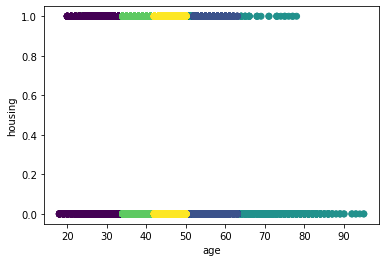

In [68]:
plt.scatter(df["age"], df["housing"], c=df["kMeansLabels"], cmap='viridis')
plt.xlabel("age")
plt.ylabel("housing")
plt.show()

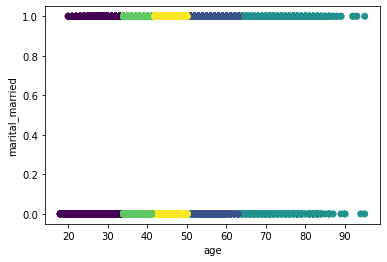

In [70]:
plt.scatter(df["age"], df["marital_married"], c=df["kMeansLabels"], cmap='viridis')
plt.xlabel("age")
plt.ylabel("marital_married")
plt.show()